# <center><font color = 'blue'> Springleaf Marketing Response</font> <center>

# Introduction

Springleaf is a lending company that prides itself on providing personal and auto loans to its customers, allowing them to take control of their lives and finances. Direct mail is a crucial part of their marketing strategy, as it offers significant value to customers who may be in need of a loan. 

This project aims to help Springleaf improve their targeted marketing efforts by predicting which customers are likely to respond to direct mail offers. To achieve this goal, we will use a large dataset of anonymized features and build a Machine Learning model. By accurately identifying the customers who are most likely to respond to direct mail offers, Springleaf can increase the efficiency of their marketing campaigns and ultimately provide more value to their customers.

# Importing libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; 
import numpy as np
import pandas as pd

import plotly.offline
sns.set()
from sklearn.cluster import KMeans

from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_validate, GridSearchCV
from sklearn.metrics import roc_auc_score, classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

# Loading and exploring data

For this project, we chose to use only the "train.csv" file as if we add the "test.csv", the size of the dataset would be too big for us.

In [2]:
df2 = pd.read_csv('train.csv')
df2.head()

,ID,VAR_0001,VAR_0002,VAR_0003,VAR_0004,VAR_0005,VAR_0006,VAR_0007,VAR_0008,VAR_0009,...,VAR_1926,VAR_1927,VAR_1928,VAR_1929,VAR_1930,VAR_1931,VAR_1932,VAR_1933,VAR_1934,target
0,2,H,224,0,4300,C,0.0,0.0,False,False,...,98,98,998,999999998,998,998,9998,9998,IAPS,0
1,4,H,7,53,4448,B,1.0,0.0,False,False,...,98,98,998,999999998,998,998,9998,9998,IAPS,0
2,5,H,116,3,3464,C,0.0,0.0,False,False,...,98,98,998,999999998,998,998,9998,9998,IAPS,0
3,7,H,240,300,3200,C,0.0,0.0,False,False,...,98,98,998,999999998,998,998,9998,9998,RCC,0
4,8,R,72,261,2000,N,0.0,0.0,False,False,...,98,98,998,999999998,998,998,9998,9998,BRANCH,1


In [3]:
# shape
df2.shape

(145231, 1934)

In [4]:
# total data
total_data = df2.shape[0]*df2.shape[1]
total_data

280876754

* In order to avoide errors caused by the size of the data, we decided to try to drop some of the features

### Missing values

In [5]:
# Total number of missing values
missing_values = df2.isnull().sum().sum()
missing_values

3511742

In [6]:
# portion of missing values
missing_values/total_data

0.012502786186428229

### Checking for duplicated rows

In [66]:
df2.duplicated().sum()

0

### Checking for duplicated columns

In [67]:
df2.loc[:,df2.apply(lambda x: x.duplicated(),axis=1).all()].copy()

,VAR_0009,VAR_0010,VAR_0011,VAR_0012,VAR_0013,VAR_0018,VAR_0019,VAR_0020,VAR_0021,VAR_0022,...,VAR_1881,VAR_1883,VAR_1884,VAR_1885,VAR_1888,VAR_1905,VAR_1910,VAR_1925,VAR_1926,target
0,False,False,False,False,0.0,0.0,0.0,0.0,0.0,0.0,...,97,97,0,0,0,98,98,0,98,0
1,False,False,False,False,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,98,0
2,False,False,False,False,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,97,0,98,0
3,False,False,False,False,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,98,98,0,98,0
4,False,False,False,False,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,98,98,0,98,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145226,False,False,False,False,2.0,0.0,0.0,0.0,0.0,0.0,...,98,98,98,98,98,98,98,0,98,0
145227,False,False,False,False,3.0,0.0,0.0,0.0,0.0,0.0,...,1,1,3,0,0,0,1,0,98,0
145228,False,False,False,False,1.0,0.0,0.0,0.0,0.0,0.0,...,98,98,98,98,98,0,4,0,98,0
145229,False,False,False,False,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,98,98,0,98,1


### Removing duplicate columns

In [70]:
# New DataFrame with dropped columns that contain duplicates
df = df2.loc[:,~df2.apply(lambda x: x.duplicated(),axis=1).all()].copy()
df
# Now we have 1518 columns.

,ID,VAR_0001,VAR_0002,VAR_0003,VAR_0004,VAR_0005,VAR_0006,VAR_0007,VAR_0008,VAR_0014,...,VAR_1923,VAR_1924,VAR_1927,VAR_1928,VAR_1929,VAR_1930,VAR_1931,VAR_1932,VAR_1933,VAR_1934
0,2,H,224,0,4300,C,0.0,0.0,False,0.0,...,999999998,9998,98,998,999999998,998,998,9998,9998,IAPS
1,4,H,7,53,4448,B,1.0,0.0,False,0.0,...,999999998,9998,98,998,999999998,998,998,9998,9998,IAPS
2,5,H,116,3,3464,C,0.0,0.0,False,0.0,...,999999998,9998,98,998,999999998,998,998,9998,9998,IAPS
3,7,H,240,300,3200,C,0.0,0.0,False,0.0,...,999999998,9998,98,998,999999998,998,998,9998,9998,RCC
4,8,R,72,261,2000,N,0.0,0.0,False,0.0,...,999999998,9998,98,998,999999998,998,998,9998,9998,BRANCH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145226,290457,H,276,144,3000,C,2.0,3.0,False,3.0,...,999999998,9998,98,998,999999998,998,998,9998,9998,BRANCH
145227,290458,R,39,414,2821,C,3.0,1.0,False,1.0,...,999999998,9998,98,998,999999998,998,998,9998,9998,IAPS
145228,290459,R,103,31,2604,B,1.0,1.0,False,1.0,...,999999998,9998,98,998,999999998,998,998,9998,9998,BRANCH
145229,290461,H,78,12,4325,C,0.0,0.0,False,0.0,...,999999998,9998,98,998,999999998,998,998,9998,9998,IAPS


### Dropping columns with only 1 unique value

In [71]:
# number of unique values per column
unique_values = df.nunique()
unique_values

ID          145231
VAR_0001         3
VAR_0002       820
VAR_0003       588
VAR_0004      7935
             ...  
VAR_1930         8
VAR_1931        10
VAR_1932        74
VAR_1933       363
VAR_1934         5
Length: 1518, dtype: int64

In [72]:
# Getting a list of columns that only have 1 unique value
cols_to_del = [i for i,j in enumerate(unique_values) if j == 1]
print(cols_to_del)

[8, 18, 145, 148, 149, 157, 158, 162, 163, 176]


In [12]:
# Verifying accuracy
df.columns[162]

'VAR_0222'

In [13]:
df['VAR_0222'].head(25)

0     C6
1     C6
2     C6
3     C6
4     C6
5     C6
6     C6
7     C6
8     C6
9     C6
10    C6
11    C6
12    C6
13    C6
14    C6
15    C6
16    C6
17    C6
18    C6
19    C6
20    C6
21    C6
22    C6
23    C6
24    C6
Name: VAR_0222, dtype: object

In [14]:
df.columns[8]

'VAR_0008'

In [15]:
(df['VAR_0008'] == True).any()

False

In [16]:
# Dropping the columns that have only 1 unique value
df.drop(columns=df.columns[df.nunique()==1], inplace=True)
df

,ID,VAR_0001,VAR_0002,VAR_0003,VAR_0004,VAR_0005,VAR_0006,VAR_0007,VAR_0014,VAR_0015,...,VAR_1923,VAR_1924,VAR_1927,VAR_1928,VAR_1929,VAR_1930,VAR_1931,VAR_1932,VAR_1933,VAR_1934
0,2,H,224,0,4300,C,0.0,0.0,0.0,0.0,...,999999998,9998,98,998,999999998,998,998,9998,9998,IAPS
1,4,H,7,53,4448,B,1.0,0.0,0.0,1.0,...,999999998,9998,98,998,999999998,998,998,9998,9998,IAPS
2,5,H,116,3,3464,C,0.0,0.0,0.0,0.0,...,999999998,9998,98,998,999999998,998,998,9998,9998,IAPS
3,7,H,240,300,3200,C,0.0,0.0,0.0,0.0,...,999999998,9998,98,998,999999998,998,998,9998,9998,RCC
4,8,R,72,261,2000,N,0.0,0.0,0.0,0.0,...,999999998,9998,98,998,999999998,998,998,9998,9998,BRANCH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145226,290457,H,276,144,3000,C,2.0,3.0,3.0,1.0,...,999999998,9998,98,998,999999998,998,998,9998,9998,BRANCH
145227,290458,R,39,414,2821,C,3.0,1.0,1.0,5.0,...,999999998,9998,98,998,999999998,998,998,9998,9998,IAPS
145228,290459,R,103,31,2604,B,1.0,1.0,1.0,1.0,...,999999998,9998,98,998,999999998,998,998,9998,9998,BRANCH
145229,290461,H,78,12,4325,C,0.0,0.0,0.0,0.0,...,999999998,9998,98,998,999999998,998,998,9998,9998,IAPS


### Dropping columns with null values surpassing 10% of column values

In [73]:
# Looking for columns with null values surpassing 10% of column values
null_cols = list()
for x in df.columns.values:
    if df[x].isnull().sum() > (df2.shape[0]*0.10):
        null_cols.append(x)
        
len(null_cols)

19

In [74]:
df.drop(columns=null_cols,inplace=True)

### Numerical values

In [20]:
# Separating only the numeric columns
df_num = df.select_dtypes(exclude=[np.object])
df_num

,ID,VAR_0002,VAR_0003,VAR_0004,VAR_0006,VAR_0007,VAR_0014,VAR_0015,VAR_0016,VAR_0017,...,VAR_1922,VAR_1923,VAR_1924,VAR_1927,VAR_1928,VAR_1929,VAR_1930,VAR_1931,VAR_1932,VAR_1933
0,2,224,0,4300,0.0,0.0,0.0,0.0,1.0,0.0,...,999999998,999999998,9998,98,998,999999998,998,998,9998,9998
1,4,7,53,4448,1.0,0.0,0.0,1.0,2.0,1.0,...,999999998,999999998,9998,98,998,999999998,998,998,9998,9998
2,5,116,3,3464,0.0,0.0,0.0,0.0,1.0,0.0,...,999999998,999999998,9998,98,998,999999998,998,998,9998,9998
3,7,240,300,3200,0.0,0.0,0.0,0.0,2.0,0.0,...,999999998,999999998,9998,98,998,999999998,998,998,9998,9998
4,8,72,261,2000,0.0,0.0,0.0,0.0,1.0,0.0,...,999999998,999999998,9998,98,998,999999998,998,998,9998,9998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145226,290457,276,144,3000,2.0,3.0,3.0,1.0,2.0,1.0,...,999999998,999999998,9998,98,998,999999998,998,998,9998,9998
145227,290458,39,414,2821,3.0,1.0,1.0,5.0,4.0,4.0,...,999999998,999999998,9998,98,998,999999998,998,998,9998,9998
145228,290459,103,31,2604,1.0,1.0,1.0,1.0,1.0,1.0,...,999999998,999999998,9998,98,998,999999998,998,998,9998,9998
145229,290461,78,12,4325,0.0,0.0,0.0,0.0,1.0,0.0,...,999999998,999999998,9998,98,998,999999998,998,998,9998,9998


### Dropping columns that have high correlation to another

In [21]:
# Create correlation matrix
corr_matrix = df_num.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
df_num.drop(to_drop, axis=1, inplace=True)

### Dropping columns that have low variance

In [22]:
# Dropping columns that have low variance
from sklearn.feature_selection import VarianceThreshold

var_thres=VarianceThreshold(threshold=0.1)
var_thres.fit(df_num)
constant_columns = [column for column in df_num.columns
                   if column not in df_num.columns[var_thres.get_support()]]
print(len(constant_columns))
df_num.drop(constant_columns, axis=1)

63


,ID,VAR_0002,VAR_0003,VAR_0004,VAR_0006,VAR_0007,VAR_0015,VAR_0016,VAR_0017,VAR_0033,...,VAR_1908,VAR_1912,VAR_1913,VAR_1918,VAR_1921,VAR_1922,VAR_1927,VAR_1929,VAR_1930,VAR_1932
0,2,224,0,4300,0.0,0.0,0.0,1.0,0.0,1.0,...,98,999999998,999999998,9998,98,999999998,98,999999998,998,9998
1,4,7,53,4448,1.0,0.0,1.0,2.0,1.0,1.0,...,0,6546,6546,9996,98,999999998,98,999999998,998,9998
2,5,116,3,3464,0.0,0.0,0.0,1.0,0.0,1.0,...,97,999999997,999999997,9996,98,999999998,98,999999998,998,9998
3,7,240,300,3200,0.0,0.0,0.0,2.0,0.0,1.0,...,98,999999998,999999998,9998,98,999999998,98,999999998,998,9998
4,8,72,261,2000,0.0,0.0,0.0,1.0,0.0,1.0,...,98,999999998,999999998,9998,98,999999998,98,999999998,998,9998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145226,290457,276,144,3000,2.0,3.0,1.0,2.0,1.0,1.0,...,98,999999998,999999998,9998,98,999999998,98,999999998,998,9998
145227,290458,39,414,2821,3.0,1.0,5.0,4.0,4.0,1.0,...,1,30425,30425,9996,98,999999998,98,999999998,998,9998
145228,290459,103,31,2604,1.0,1.0,1.0,1.0,1.0,1.0,...,4,999999996,999999996,55,98,999999998,98,999999998,998,9998
145229,290461,78,12,4325,0.0,0.0,0.0,1.0,0.0,1.0,...,98,999999998,999999998,9998,98,999999998,98,999999998,998,9998


In [23]:
# Checking the constant columns from above
constant_columns

['VAR_0045',
 'VAR_0046',
 'VAR_0047',
 'VAR_0048',
 'VAR_0052',
 'VAR_0090',
 'VAR_0093',
 'VAR_0101',
 'VAR_0108',
 'VAR_0109',
 'VAR_0117',
 'VAR_0122',
 'VAR_0125',
 'VAR_0126',
 'VAR_0127',
 'VAR_0131',
 'VAR_0132',
 'VAR_0140',
 'VAR_0146',
 'VAR_0148',
 'VAR_0150',
 'VAR_0151',
 'VAR_0160',
 'VAR_0162',
 'VAR_0183',
 'VAR_0184',
 'VAR_0185',
 'VAR_0186',
 'VAR_0195',
 'VAR_0219',
 'VAR_0220',
 'VAR_0247',
 'VAR_0249',
 'VAR_0250',
 'VAR_0261',
 'VAR_0278',
 'VAR_0355',
 'VAR_0374',
 'VAR_0375',
 'VAR_0382',
 'VAR_0388',
 'VAR_0389',
 'VAR_0390',
 'VAR_0391',
 'VAR_0409',
 'VAR_0416',
 'VAR_0421',
 'VAR_0422',
 'VAR_0431',
 'VAR_0432',
 'VAR_0450',
 'VAR_0452',
 'VAR_0453',
 'VAR_0456',
 'VAR_0457',
 'VAR_0460',
 'VAR_0479',
 'VAR_0491',
 'VAR_0500',
 'VAR_0509',
 'VAR_0510',
 'VAR_0565',
 'VAR_0569']

In [26]:
# Checking the to_drop columns from above
to_drop

['VAR_0014',
 'VAR_0051',
 'VAR_0058',
 'VAR_0062',
 'VAR_0064',
 'VAR_0065',
 'VAR_0068',
 'VAR_0069',
 'VAR_0072',
 'VAR_0076',
 'VAR_0077',
 'VAR_0078',
 'VAR_0079',
 'VAR_0080',
 'VAR_0081',
 'VAR_0082',
 'VAR_0083',
 'VAR_0084',
 'VAR_0085',
 'VAR_0086',
 'VAR_0087',
 'VAR_0088',
 'VAR_0089',
 'VAR_0091',
 'VAR_0092',
 'VAR_0095',
 'VAR_0123',
 'VAR_0171',
 'VAR_0234',
 'VAR_0235',
 'VAR_0241',
 'VAR_0255',
 'VAR_0273',
 'VAR_0282',
 'VAR_0304',
 'VAR_0418',
 'VAR_0485',
 'VAR_0486',
 'VAR_0533',
 'VAR_0534',
 'VAR_0535',
 'VAR_0537',
 'VAR_0538',
 'VAR_0539',
 'VAR_0542',
 'VAR_0543',
 'VAR_0544',
 'VAR_0547',
 'VAR_0549',
 'VAR_0559',
 'VAR_0560',
 'VAR_0573',
 'VAR_0578',
 'VAR_0581',
 'VAR_0582',
 'VAR_0585',
 'VAR_0587',
 'VAR_0588',
 'VAR_0589',
 'VAR_0590',
 'VAR_0591',
 'VAR_0592',
 'VAR_0593',
 'VAR_0594',
 'VAR_0595',
 'VAR_0596',
 'VAR_0597',
 'VAR_0599',
 'VAR_0601',
 'VAR_0602',
 'VAR_0603',
 'VAR_0605',
 'VAR_0606',
 'VAR_0609',
 'VAR_0610',
 'VAR_0611',
 'VAR_0612',

In [27]:
# Testing if 'VAR_0014' is removed from df and df_num
df['VAR_0014']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
145226    3.0
145227    1.0
145228    1.0
145229    0.0
145230    0.0
Name: VAR_0014, Length: 145231, dtype: float64

In [28]:
df_num['VAR_0014']

KeyError: 'VAR_0014'

In [29]:
# Combining the 2 lists
to_drop.extend(constant_columns)

In [30]:
# Dropping them from df
df.drop(columns=to_drop,inplace=True)

In [31]:
# Testing if 'VAR_0014' is dropped from df
df['VAR_0014']

KeyError: 'VAR_0014'

In [32]:
df.head()
# We have 672 columns now.

,ID,VAR_0001,VAR_0002,VAR_0003,VAR_0004,VAR_0005,VAR_0006,VAR_0007,VAR_0015,VAR_0016,...,VAR_1912,VAR_1913,VAR_1918,VAR_1921,VAR_1922,VAR_1927,VAR_1929,VAR_1930,VAR_1932,VAR_1934
0,2,H,224,0,4300,C,0.0,0.0,0.0,1.0,...,999999998,999999998,9998,98,999999998,98,999999998,998,9998,IAPS
1,4,H,7,53,4448,B,1.0,0.0,1.0,2.0,...,6546,6546,9996,98,999999998,98,999999998,998,9998,IAPS
2,5,H,116,3,3464,C,0.0,0.0,0.0,1.0,...,999999997,999999997,9996,98,999999998,98,999999998,998,9998,IAPS
3,7,H,240,300,3200,C,0.0,0.0,0.0,2.0,...,999999998,999999998,9998,98,999999998,98,999999998,998,9998,RCC
4,8,R,72,261,2000,N,0.0,0.0,0.0,1.0,...,999999998,999999998,9998,98,999999998,98,999999998,998,9998,BRANCH


### Non-numeric columns

In [33]:
# Checking the non-numeric columns
df_nonnum = df.select_dtypes(exclude=[np.number])
df_nonnum

,VAR_0001,VAR_0005,VAR_0075,VAR_0200,VAR_0204,VAR_0217,VAR_0237,VAR_0274,VAR_0283,VAR_0305,VAR_0325,VAR_0342,VAR_0352,VAR_0353,VAR_0354,VAR_0404,VAR_0466,VAR_0467,VAR_0493,VAR_1934
0,H,C,08NOV11:00:00:00,FT LAUDERDALE,29JAN14:21:16:00,08NOV11:02:00:00,FL,FL,S,S,-1,CF,O,U,O,CHIEF EXECUTIVE OFFICER,-1,-1,COMMUNITY ASSOCIATION MANAGER,IAPS
1,H,B,10NOV11:00:00:00,SANTEE,01FEB14:00:11:00,02OCT12:02:00:00,CA,MI,S,S,H,EC,O,R,R,-1,I,Discharged,-1,IAPS
2,H,C,13DEC11:00:00:00,REEDSVILLE,30JAN14:15:11:00,13DEC11:02:00:00,WV,WV,S,P,R,UU,R,R,-1,-1,-1,-1,-1,IAPS
3,H,C,23SEP10:00:00:00,LIBERTY,01FEB14:00:07:00,01NOV12:02:00:00,TX,TX,S,P,H,-1,R,R,-1,-1,-1,-1,-1,RCC
4,R,N,15OCT11:00:00:00,FRANKFORT,29JAN14:19:31:00,15OCT11:02:00:00,IL,IL,S,P,S,-1,R,U,O,-1,-1,-1,-1,BRANCH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145226,H,C,27APR10:00:00:00,LAFAYETTE,31JAN14:16:36:00,07JUL12:02:00:00,LA,LA,S,H,S,-1,R,U,R,-1,-1,-1,-1,BRANCH
145227,R,C,22DEC08:00:00:00,GARDENA,30JAN14:23:23:00,24MAY12:02:00:00,CA,CA,H,H,S,BE,R,U,R,-1,I,Discharged,-1,IAPS
145228,R,B,29NOV11:00:00:00,COVINA,31JAN14:21:10:00,21AUG12:02:00:00,CA,CA,S,S,P,CC,U,R,-1,-1,-1,-1,-1,BRANCH
145229,H,C,09MAY12:00:00:00,BATAVIA,30JAN14:22:34:00,09MAY12:02:00:00,OH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IAPS


After eye-balling the 20 columns above, we can tell that columns VAR_0075, VAR_0204 and VAR_0217 contain datetime values. 

We want to separate each of them into 3 different columns using their year, month and day.

In [34]:
# Separating datetime data to day, month, year

date_list = ['VAR_0075','VAR_0204','VAR_0217']

for i in date_list:
    
    df[i+'m']=(pd.to_datetime(df[i],format ='%d%b%y:%H:%M:%S').map(lambda x: x.month))
    df[i+'d']=(pd.to_datetime(df[i],format ='%d%b%y:%H:%M:%S').map(lambda x: x.weekday()))
    df[i+'y']=(pd.to_datetime(df[i],format ='%d%b%y:%H:%M:%S').map(lambda x: x.year))
    df.drop(i, axis=1, inplace=True)

In [35]:
df.head()
# We have 678 columns now.

,ID,VAR_0001,VAR_0002,VAR_0003,VAR_0004,VAR_0005,VAR_0006,VAR_0007,VAR_0015,VAR_0016,...,VAR_1934,VAR_0075m,VAR_0075d,VAR_0075y,VAR_0204m,VAR_0204d,VAR_0204y,VAR_0217m,VAR_0217d,VAR_0217y
0,2,H,224,0,4300,C,0.0,0.0,0.0,1.0,...,IAPS,11.0,1.0,2011.0,1.0,2.0,2014.0,11.0,1.0,2011.0
1,4,H,7,53,4448,B,1.0,0.0,1.0,2.0,...,IAPS,11.0,3.0,2011.0,2.0,5.0,2014.0,10.0,1.0,2012.0
2,5,H,116,3,3464,C,0.0,0.0,0.0,1.0,...,IAPS,12.0,1.0,2011.0,1.0,3.0,2014.0,12.0,1.0,2011.0
3,7,H,240,300,3200,C,0.0,0.0,0.0,2.0,...,RCC,9.0,3.0,2010.0,2.0,5.0,2014.0,11.0,3.0,2012.0
4,8,R,72,261,2000,N,0.0,0.0,0.0,1.0,...,BRANCH,10.0,5.0,2011.0,1.0,2.0,2014.0,10.0,5.0,2011.0


In [37]:
# Taking look at the rest of the non-numeric columns
df_nonnum = df.select_dtypes(exclude=[np.number])
df_nonnum

,VAR_0001,VAR_0005,VAR_0200,VAR_0237,VAR_0274,VAR_0283,VAR_0305,VAR_0325,VAR_0342,VAR_0352,VAR_0353,VAR_0354,VAR_0404,VAR_0466,VAR_0467,VAR_0493,VAR_1934
0,H,C,FT LAUDERDALE,FL,FL,S,S,-1,CF,O,U,O,CHIEF EXECUTIVE OFFICER,-1,-1,COMMUNITY ASSOCIATION MANAGER,IAPS
1,H,B,SANTEE,CA,MI,S,S,H,EC,O,R,R,-1,I,Discharged,-1,IAPS
2,H,C,REEDSVILLE,WV,WV,S,P,R,UU,R,R,-1,-1,-1,-1,-1,IAPS
3,H,C,LIBERTY,TX,TX,S,P,H,-1,R,R,-1,-1,-1,-1,-1,RCC
4,R,N,FRANKFORT,IL,IL,S,P,S,-1,R,U,O,-1,-1,-1,-1,BRANCH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145226,H,C,LAFAYETTE,LA,LA,S,H,S,-1,R,U,R,-1,-1,-1,-1,BRANCH
145227,R,C,GARDENA,CA,CA,H,H,S,BE,R,U,R,-1,I,Discharged,-1,IAPS
145228,R,B,COVINA,CA,CA,S,S,P,CC,U,R,-1,-1,-1,-1,-1,BRANCH
145229,H,C,BATAVIA,OH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IAPS


In [40]:
df_nonnum.columns.values

array(['VAR_0001', 'VAR_0005', 'VAR_0200', 'VAR_0237', 'VAR_0274',
       'VAR_0283', 'VAR_0305', 'VAR_0325', 'VAR_0342', 'VAR_0352',
       'VAR_0353', 'VAR_0354', 'VAR_0404', 'VAR_0466', 'VAR_0467',
       'VAR_0493', 'VAR_1934'], dtype=object)

In [45]:
# for column 'VAR_0404', 89% of its values is '-1'
(df_nonnum['VAR_0404'].value_counts()[0])/df.shape[0]

0.8981760092542226

In [60]:
# Exploring the distribution of values in each non-numeric columns
for col in df_nonnum.columns.values:
    print(df_nonnum[col].value_counts())

R    84893
H    59829
Q      509
Name: VAR_0001, dtype: int64
B    71449
C    54299
N    16605
S     2878
Name: VAR_0005, dtype: int64
CHICAGO         2091
HOUSTON         1306
JACKSONVILLE    1063
SAN ANTONIO     1012
INDIANAPOLIS     866
                ... 
CENTENNAIAL        1
BAISDEN            1
LOS SERRANOS       1
E PASO             1
PITTSVILE          1
Name: VAR_0200, Length: 12385, dtype: int64
CA    15770
TX    14186
NC    11691
GA     8730
IL     8479
VA     8081
OH     7307
FL     7004
PA     6937
SC     6083
IN     5506
TN     5226
AL     4985
WA     3722
KY     3404
LA     3284
MO     3257
CO     2808
MS     2386
OK     2338
WI     2234
OR     1523
WV     1459
NY     1372
NM     1322
AZ     1099
MI     1027
ID      695
MD      592
KS      548
NJ      536
UT      293
HI      264
IA      241
DE      161
NE      151
NV      146
WY      109
MT      105
SD       66
DC       28
AR        9
MN        9
CT        1
AK        1
Name: VAR_0237, dtype: int64
CA    16258
TX    119

R    84893
H    59829
Q      509
Name: VAR_0001, dtype: int64


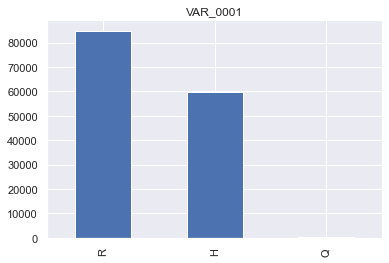

In [55]:
print(df_nonnum['VAR_0001'].value_counts())
df_nonnum['VAR_0001'].value_counts().plot(kind='bar', title='VAR_0001');

B    71449
C    54299
N    16605
S     2878
Name: VAR_0005, dtype: int64


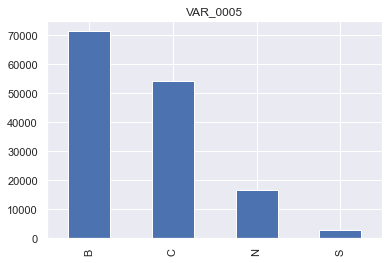

In [56]:
print(df_nonnum['VAR_0005'].value_counts())
df_nonnum['VAR_0005'].value_counts().plot(kind='bar', title='VAR_0005');

### Applying Ordinal Encoding to nonnum columns

As one hot encoder would generate a lot more features, we chose to use the ordinal encoder.

In [61]:
from sklearn.preprocessing import OrdinalEncoder

In [72]:
oe = OrdinalEncoder()
df_atp1 = oe.fit_transform(df)

In [74]:
df_atp1=pd.DataFrame(df_atp1,columns=df.columns.values)
df_atp1

,ID,VAR_0001,VAR_0002,VAR_0003,VAR_0004,VAR_0005,VAR_0006,VAR_0007,VAR_0015,VAR_0016,...,VAR_1934,VAR_0075m,VAR_0075d,VAR_0075y,VAR_0204m,VAR_0204d,VAR_0204y,VAR_0217m,VAR_0217d,VAR_0217y
0,0.0,0.0,224.0,0.0,3817.0,1.0,0.0,0.0,0.0,1.0,...,2.0,10.0,1.0,9.0,0.0,0.0,0.0,10.0,1.0,0.0
1,1.0,0.0,7.0,53.0,3965.0,0.0,1.0,0.0,1.0,2.0,...,2.0,10.0,3.0,9.0,1.0,3.0,0.0,9.0,1.0,1.0
2,2.0,0.0,116.0,3.0,2982.0,1.0,0.0,0.0,0.0,1.0,...,2.0,11.0,1.0,9.0,0.0,1.0,0.0,11.0,1.0,0.0
3,3.0,0.0,240.0,300.0,2718.0,1.0,0.0,0.0,0.0,2.0,...,4.0,8.0,3.0,8.0,1.0,3.0,0.0,10.0,3.0,1.0
4,4.0,2.0,72.0,261.0,1518.0,2.0,0.0,0.0,0.0,1.0,...,0.0,9.0,5.0,9.0,0.0,0.0,0.0,9.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145226,145226.0,0.0,276.0,144.0,2518.0,1.0,2.0,3.0,1.0,2.0,...,0.0,3.0,1.0,8.0,0.0,2.0,0.0,6.0,5.0,1.0
145227,145227.0,2.0,39.0,414.0,2339.0,1.0,3.0,1.0,5.0,4.0,...,2.0,11.0,0.0,6.0,0.0,1.0,0.0,4.0,3.0,1.0
145228,145228.0,2.0,103.0,31.0,2122.0,0.0,1.0,1.0,1.0,1.0,...,0.0,10.0,1.0,9.0,0.0,2.0,0.0,7.0,1.0,1.0
145229,145229.0,0.0,78.0,12.0,3842.0,1.0,0.0,0.0,0.0,1.0,...,2.0,4.0,2.0,10.0,0.0,1.0,0.0,4.0,2.0,1.0


In [75]:
# Testing if the ordinal encoder works as we expected
print(df_nonnum['VAR_0005'].value_counts())

B    71449
C    54299
N    16605
S     2878
Name: VAR_0005, dtype: int64


In [76]:
# It does.
print(df_atp1['VAR_0005'].value_counts())

0.0    71449
1.0    54299
2.0    16605
3.0     2878
Name: VAR_0005, dtype: int64


In [18]:
print(df_atp1['VAR_0237'].value_counts())

4.0     15770
38.0    14186
25.0    11691
10.0     8730
14.0     8479
40.0     8081
31.0     7307
9.0      7004
34.0     6937
35.0     6083
15.0     5506
37.0     5226
1.0      4985
41.0     3722
17.0     3404
18.0     3284
22.0     3257
5.0      2808
23.0     2386
32.0     2338
42.0     2234
33.0     1523
43.0     1459
30.0     1372
28.0     1322
3.0      1099
20.0     1027
13.0      695
19.0      592
16.0      548
27.0      536
39.0      293
11.0      264
12.0      241
8.0       161
26.0      151
29.0      146
44.0      109
24.0      105
36.0       66
0.0        57
7.0        28
2.0         9
21.0        9
6.0         1
Name: VAR_0237, dtype: int64


In [77]:
# Testing if there are still categorical columns
df_atp1.select_dtypes(exclude=[np.number])
# none

""
0
1
2
3
4
...
145226
145227
145228
145229


### Saving the feature dataset "df_atp1" to csv.

In [104]:
# Saving it to csv
df_atp1.to_csv('df_atp1')

In [3]:
# Reading it from the csv
df_atp1=pd.read_csv('df_atp1')
df_atp1

,Unnamed: 0,ID,VAR_0001,VAR_0002,VAR_0003,VAR_0004,VAR_0005,VAR_0006,VAR_0007,VAR_0015,...,VAR_1934,VAR_0075m,VAR_0075d,VAR_0075y,VAR_0204m,VAR_0204d,VAR_0204y,VAR_0217m,VAR_0217d,VAR_0217y
0,0,0.0,0.0,224.0,0.0,3817.0,1.0,0.0,0.0,0.0,...,2.0,10.0,1.0,9.0,0.0,0.0,0.0,10.0,1.0,0.0
1,1,1.0,0.0,7.0,53.0,3965.0,0.0,1.0,0.0,1.0,...,2.0,10.0,3.0,9.0,1.0,3.0,0.0,9.0,1.0,1.0
2,2,2.0,0.0,116.0,3.0,2982.0,1.0,0.0,0.0,0.0,...,2.0,11.0,1.0,9.0,0.0,1.0,0.0,11.0,1.0,0.0
3,3,3.0,0.0,240.0,300.0,2718.0,1.0,0.0,0.0,0.0,...,4.0,8.0,3.0,8.0,1.0,3.0,0.0,10.0,3.0,1.0
4,4,4.0,2.0,72.0,261.0,1518.0,2.0,0.0,0.0,0.0,...,0.0,9.0,5.0,9.0,0.0,0.0,0.0,9.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145226,145226,145226.0,0.0,276.0,144.0,2518.0,1.0,2.0,3.0,1.0,...,0.0,3.0,1.0,8.0,0.0,2.0,0.0,6.0,5.0,1.0
145227,145227,145227.0,2.0,39.0,414.0,2339.0,1.0,3.0,1.0,5.0,...,2.0,11.0,0.0,6.0,0.0,1.0,0.0,4.0,3.0,1.0
145228,145228,145228.0,2.0,103.0,31.0,2122.0,0.0,1.0,1.0,1.0,...,0.0,10.0,1.0,9.0,0.0,2.0,0.0,7.0,1.0,1.0
145229,145229,145229.0,0.0,78.0,12.0,3842.0,1.0,0.0,0.0,0.0,...,2.0,4.0,2.0,10.0,0.0,1.0,0.0,4.0,2.0,1.0


In [4]:
df_atp1.drop(columns='Unnamed: 0',inplace=True)

In [5]:
df_atp1

,ID,VAR_0001,VAR_0002,VAR_0003,VAR_0004,VAR_0005,VAR_0006,VAR_0007,VAR_0015,VAR_0016,...,VAR_1934,VAR_0075m,VAR_0075d,VAR_0075y,VAR_0204m,VAR_0204d,VAR_0204y,VAR_0217m,VAR_0217d,VAR_0217y
0,0.0,0.0,224.0,0.0,3817.0,1.0,0.0,0.0,0.0,1.0,...,2.0,10.0,1.0,9.0,0.0,0.0,0.0,10.0,1.0,0.0
1,1.0,0.0,7.0,53.0,3965.0,0.0,1.0,0.0,1.0,2.0,...,2.0,10.0,3.0,9.0,1.0,3.0,0.0,9.0,1.0,1.0
2,2.0,0.0,116.0,3.0,2982.0,1.0,0.0,0.0,0.0,1.0,...,2.0,11.0,1.0,9.0,0.0,1.0,0.0,11.0,1.0,0.0
3,3.0,0.0,240.0,300.0,2718.0,1.0,0.0,0.0,0.0,2.0,...,4.0,8.0,3.0,8.0,1.0,3.0,0.0,10.0,3.0,1.0
4,4.0,2.0,72.0,261.0,1518.0,2.0,0.0,0.0,0.0,1.0,...,0.0,9.0,5.0,9.0,0.0,0.0,0.0,9.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145226,145226.0,0.0,276.0,144.0,2518.0,1.0,2.0,3.0,1.0,2.0,...,0.0,3.0,1.0,8.0,0.0,2.0,0.0,6.0,5.0,1.0
145227,145227.0,2.0,39.0,414.0,2339.0,1.0,3.0,1.0,5.0,4.0,...,2.0,11.0,0.0,6.0,0.0,1.0,0.0,4.0,3.0,1.0
145228,145228.0,2.0,103.0,31.0,2122.0,0.0,1.0,1.0,1.0,1.0,...,0.0,10.0,1.0,9.0,0.0,2.0,0.0,7.0,1.0,1.0
145229,145229.0,0.0,78.0,12.0,3842.0,1.0,0.0,0.0,0.0,1.0,...,2.0,4.0,2.0,10.0,0.0,1.0,0.0,4.0,2.0,1.0


## Explore the target variable

In [89]:
print ("target data format: {}".format(type(df2.target)))
print ("target variable shape: {}".format(df2.target.shape)) #1-D Array
print ("number of target classes: {}".format(df2.target.nunique())) #How many unique values are in that array
print ("target variable unique values: {}".format(np.unique(df2.target, return_index=False)))

df2.target[:5]

target data format: <class 'pandas.core.series.Series'>
target variable shape: (145231,)
number of target classes: 2
target variable unique values: [0 1]


0    0
1    0
2    0
3    0
4    1
Name: target, dtype: int64

In [6]:
target = df2['target'].to_frame()
target.head()

,target
0,0
1,0
2,0
3,0
4,1


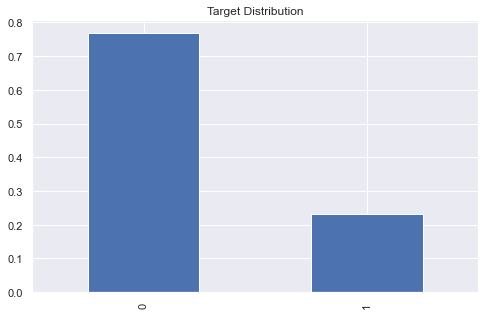

In [91]:
# Visualizing the target distribution
(target['target'].value_counts()/target.size).plot(kind='bar', title='Target Distribution', figsize=(8,5));

# Train Test Split

In [8]:
df_atp1.head()

,ID,VAR_0001,VAR_0002,VAR_0003,VAR_0004,VAR_0005,VAR_0006,VAR_0007,VAR_0015,VAR_0016,...,VAR_1934,VAR_0075m,VAR_0075d,VAR_0075y,VAR_0204m,VAR_0204d,VAR_0204y,VAR_0217m,VAR_0217d,VAR_0217y
0,0.0,0.0,224.0,0.0,3817.0,1.0,0.0,0.0,0.0,1.0,...,2.0,10.0,1.0,9.0,0.0,0.0,0.0,10.0,1.0,0.0
1,1.0,0.0,7.0,53.0,3965.0,0.0,1.0,0.0,1.0,2.0,...,2.0,10.0,3.0,9.0,1.0,3.0,0.0,9.0,1.0,1.0
2,2.0,0.0,116.0,3.0,2982.0,1.0,0.0,0.0,0.0,1.0,...,2.0,11.0,1.0,9.0,0.0,1.0,0.0,11.0,1.0,0.0
3,3.0,0.0,240.0,300.0,2718.0,1.0,0.0,0.0,0.0,2.0,...,4.0,8.0,3.0,8.0,1.0,3.0,0.0,10.0,3.0,1.0
4,4.0,2.0,72.0,261.0,1518.0,2.0,0.0,0.0,0.0,1.0,...,0.0,9.0,5.0,9.0,0.0,0.0,0.0,9.0,5.0,0.0


In [7]:
X = df_atp1
y = target.values.ravel()

print(X.shape)
print(y.shape)

(145231, 678)
(145231,)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
print ("training X data points: {}".format(len(X_train)))
print ("testing X data points: {}".format(len(X_test)))

print ("training y data points: {}".format(len(y_train)))
print ("testing y data points: {}".format(len(y_test)))

training X data points: 97304
testing X data points: 47927
training y data points: 97304
testing y data points: 47927


# Filling missing with mean

* We have also tested filling missing with 0 and median on another notebook, and it turns out that it doesn't really affect the accuracy for our models. 

In [11]:
X_train=X_train.fillna(X_train.mean())
X_test=X_test.fillna(X_test.mean())
y_train=pd.DataFrame(y_train).fillna(y_train.mean()).to_numpy()
y_test=pd.DataFrame(y_test).fillna(y_test.mean()).to_numpy()

## Random Over Sampling and Normalization

As our dataset is imbalanced. We used random over sampler then normalized our X.

In [9]:
ros = RandomOverSampler(random_state=42) # Random Over Sampling 

X_resampled, y_resampled = ros.fit_resample(X_train, y_train) # y_train

scaler = StandardScaler()  # Scale

scaler.fit(X_resampled)
X_train_scale = scaler.transform(X_resampled) # X_train
X_test_scale = scaler.transform(X_test) # X_test

# Model Fitting

In this part, we will try different algorithms with default parameters, pick the one with the highest score, then perform hyperparameter tunning on it.

## KNN

In [142]:
knn = KNeighborsClassifier(n_neighbors=5)

model = knn.fit(X_train_scale, y_resampled)
y_pred = knn.predict(X_test_scale)

print('accuracy =',accuracy_score(y_test, y_pred))
print('score=',knn.score(X_test_scale, y_test))

# This score is expected.
# KNN acctually doesn't work well with high dimensional data.

accuracy = 0.6430613224278591
score= 0.6430613224278591


In [143]:
print(classification_report(y_test, y_pred))
print(cross_val_score(rf,X,y,cv=5).mean())

              precision    recall  f1-score   support

         0.0       0.82      0.68      0.75     36753
         1.0       0.33      0.51      0.40     11174

    accuracy                           0.64     47927
   macro avg       0.58      0.60      0.57     47927
weighted avg       0.71      0.64      0.67     47927

0.7752614771472299


## Decision Tree

In [80]:
# Trying our decision tree starting with max_depth=1
dt=DecisionTreeClassifier(max_depth=1)

model = dt.fit(X_train_scale,y_resampled)
y_pred = model.predict(X_test_scale)

accuracy_score(y_test,y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.78      0.81     36753
         1.0       0.40      0.47      0.43     11174

    accuracy                           0.71     47927
   macro avg       0.61      0.63      0.62     47927
weighted avg       0.73      0.71      0.72     47927



In [81]:
# Checking the cross_val_score
cross_val_score(rf,X,y,cv=5).mean()

0.7752614771472299

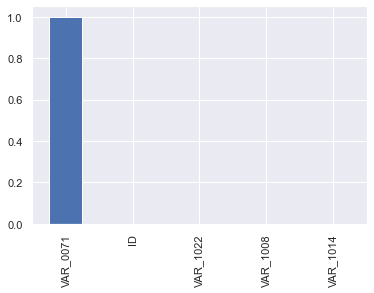

In [20]:
# Plotting feature importance
pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False).head(5).plot(kind='bar');

In [110]:
# Checking VAR_0071 -- the most important feature based on the chart above
df_atp1['VAR_0071']

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
145226    16.0
145227    14.0
145228     5.0
145229     0.0
145230     0.0
Name: VAR_0071, Length: 145231, dtype: float64

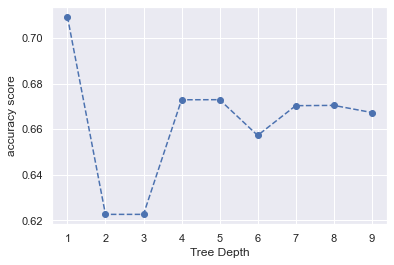

In [76]:
# Checking and ploting the accuracy scores when dt has a max_depth from 1 to 10
nrow = len(X_train_scale)
depthList = np.array(range(1,10)) #search depth list
score_history =[] #save evaluations here

for iDepth in depthList:
     
    dt=DecisionTreeClassifier(max_depth=iDepth)
    model = dt.fit(X_train_scale,y_resampled)
    y_pred = model.predict(X_test_scale)
    y_pred = np.array(y_pred, dtype = np.float32)
    y_test = np.array(y_test, dtype = np.float32)
    
    score = accuracy_score(y_test,y_pred)
    score_history.append(score)
    
    
plt.figure()
plt.plot(depthList, score_history, marker = 'o', linestyle = 'dashed')
plt.axis('tight')
plt.xlabel('Tree Depth')
plt.ylabel('accuracy score')
plt.show()

In [21]:
# Adjusting max_depth
dt=DecisionTreeClassifier(max_depth=5)
model = dt.fit(X_train_scale,y_resampled)

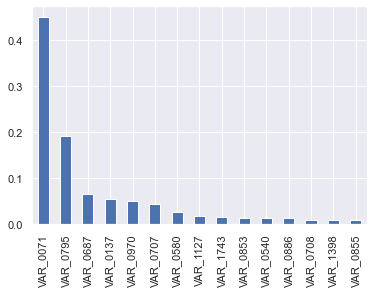

In [22]:
# New Feature Importance
pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False).head(15).plot(kind='bar');

In [77]:
# New report when max_depth = 5
dt=DecisionTreeClassifier(max_depth=5)

model = dt.fit(X_train_scale,y_resampled)
y_pred = model.predict(X_test_scale)

accuracy_score(y_test,y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.68      0.76     36753
         1.0       0.38      0.64      0.48     11174

    accuracy                           0.67     47927
   macro avg       0.62      0.66      0.62     47927
weighted avg       0.75      0.67      0.70     47927



## Logistic Regression

In [138]:
lr = LogisticRegression(random_state=42)

model = lr.fit(X_train_scale,y_resampled)

y_pred = model.predict(X_test_scale)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.72      0.79     36753
         1.0       0.42      0.67      0.52     11174

    accuracy                           0.71     47927
   macro avg       0.65      0.70      0.66     47927
weighted avg       0.77      0.71      0.73     47927



In [83]:
# Checking the cross_val_score
cross_val_score(rf,X,y,cv=5).mean()

0.7752614771472299

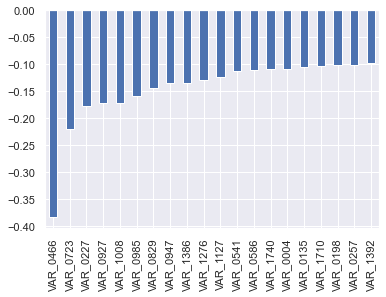

In [22]:
# Ploting the coef of the features
pd.Series(lr.coef_[0], index=X.columns).sort_values().head(20).plot(kind='bar');

In [21]:
pd.Series(lr.coef_[0], index=X.columns).sort_values()

VAR_0466   -0.383372
VAR_0723   -0.219294
VAR_0227   -0.176980
VAR_0927   -0.171818
VAR_1008   -0.171126
              ...   
VAR_0796    0.186784
VAR_0795    0.190347
VAR_0729    0.193075
VAR_0467    0.198248
VAR_0989    0.230789
Length: 678, dtype: float64

Feature: 0, Score: -0.00782
Feature: 1, Score: -0.01195
Feature: 2, Score: -0.00408
Feature: 3, Score: -0.05445
Feature: 4, Score: -0.10917
Feature: 5, Score: 0.07045
Feature: 6, Score: 0.05739
Feature: 7, Score: -0.00631
Feature: 8, Score: 0.03177
Feature: 9, Score: 0.05641
Feature: 10, Score: -0.03743
Feature: 11, Score: -0.01910
Feature: 12, Score: -0.00613
Feature: 13, Score: 0.04276
Feature: 14, Score: 0.03129
Feature: 15, Score: 0.03254
Feature: 16, Score: 0.01201
Feature: 17, Score: 0.00800
Feature: 18, Score: 0.01550
Feature: 19, Score: 0.11361
Feature: 20, Score: -0.08937
Feature: 21, Score: -0.01268
Feature: 22, Score: -0.01258
Feature: 23, Score: 0.00066
Feature: 24, Score: 0.08561
Feature: 25, Score: -0.04972
Feature: 26, Score: 0.03682
Feature: 27, Score: 0.03336
Feature: 28, Score: -0.03567
Feature: 29, Score: 0.00398
Feature: 30, Score: -0.06237
Feature: 31, Score: -0.03421
Feature: 32, Score: -0.00209
Feature: 33, Score: 0.01710
Feature: 34, Score: -0.02705
Feature: 35,

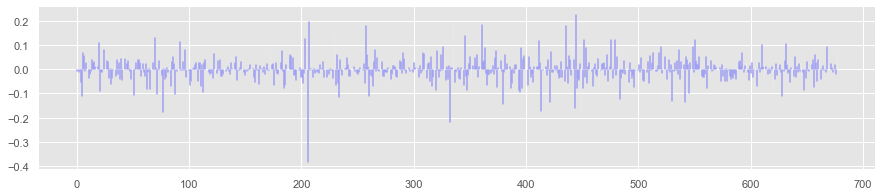

In [140]:
from matplotlib import pyplot
# get importance
importance = model.coef_[0]

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance, color='blue')
pyplot.style.use('ggplot')
pyplot.show()

## Random Forest

In [119]:
rf = RandomForestClassifier(max_depth=5, n_jobs=-1, random_state= 42, n_estimators=100)

model = rf.fit(X_train_scale,y_resampled)

y_pred = model.predict(X_test_scale)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.72      0.78     36753
         1.0       0.40      0.62      0.49     11174

    accuracy                           0.70     47927
   macro avg       0.63      0.67      0.64     47927
weighted avg       0.75      0.70      0.72     47927



In [22]:
# Checking the cross_val_score
rf = RandomForestClassifier(n_estimators=75, max_depth=5, n_jobs=-1, random_state= 42)
cross_val_score(rf,X,y,cv=5).mean()

0.7752545941251036

## Support Vector Machine

* We tried to fit SVM to our data, but it took too long, and we never got the result.

In [ ]:
svm = SVC(C=10)

svm.fit(X_train_scale,y_resampled)

# plot_decision_regions(X_train_scale.values, y_resampled.values, clf=svm)

svm.score(X_test_d, y_test_d)

In [ ]:
# classification report
y_pred = svm.fit(X_train_scale,y_resampled).predict(X_test_scale)

print(classification_report(y_test, y_pred))

## XGBoost

In [24]:
# Importing libraries for XGBoost
from xgboost import XGBClassifier
from sklearn.calibration import CalibratedClassifierCV

In [26]:
# Getting cross_val_score
xgb = xgb.XGBClassifier()
cross_val_score(xgb,X,y,cv=5).mean()

0.7818441955498825

In [17]:
clf = xgb.XGBClassifier()
metLearn=CalibratedClassifierCV(clf, method='isotonic', cv=2)
metLearn.fit(X_train_scale, y_resampled)
testPredictions = metLearn.predict(X_test_scale)

In [18]:
print(classification_report(y_test, testPredictions))

              precision    recall  f1-score   support

           0       0.87      0.77      0.82     36753
           1       0.45      0.62      0.52     11174

    accuracy                           0.74     47927
   macro avg       0.66      0.70      0.67     47927
weighted avg       0.77      0.74      0.75     47927



### Plotting the scores for each model

In [6]:
algo = ['KNN','Decision Tree', 'Logistic Regression', 'Random Forest', 'XGBoost']
accuracy = [0.643, 0.67, 0.71, 0.7, 0.74]
f1 = [0.75, 0.76, 0.79, 0.78, 0.82]
cross = [0.775, 0.775, 0.775, 0.775, 0.782]

In [7]:
lildf=pd.DataFrame(list(zip(algo,accuracy,f1,cross)), columns=['Algos','Accuracy','F1', 'Cross_val_score'])
lildf

,Algos,Accuracy,F1,Cross_val_score
0,KNN,0.643,0.75,0.775
1,Decision Tree,0.670,0.76,0.775
2,Logistic Regression,0.710,0.79,0.775
3,Random Forest,0.700,0.78,0.775
4,XGBoost,0.740,0.82,0.782


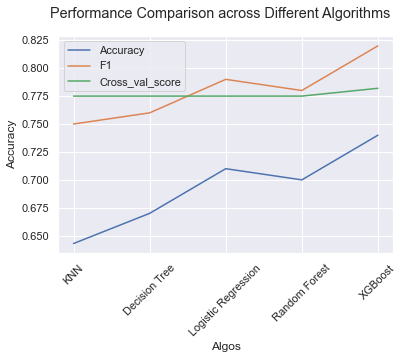

In [12]:
fig,ax = plt.subplots()
sns.lineplot(data=lildf,x='Algos',y='Accuracy')
sns.lineplot(data=lildf,x='Algos',y='F1')
sns.lineplot(data=lildf,x='Algos',y='Cross_val_score')
plt.xticks(rotation=45);
plt.legend(labels=['Accuracy','F1','Cross_val_score'])
fig.suptitle('Performance Comparison across Different Algorithms');

* Among all the algorithms that we tested, XGBoost has the highest score.
* We will perform hyperparameter tuning on XGBoost next.

#### First attempt: putting all common parameters into grid search

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {
    'learning_rate': [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
    'max_depth': range(1,20),
    'subsample':[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
    'colsample_bytree':[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
    'n_estimators':range(1,500,25),
    'objective':['binary:logistic']
}

model = xgb.XGBClassifier()

gs = GridSearchCV(model, parameters, cv=5, scoring=['f1', 'accuracy'], verbose=2, n_jobs=-1, refit='f1')

gs.fit(X_train_scale, y_resampled)

# This code takes too long to run. We believe that we don't have enough computing power. 
# So we will change our approach.

## Hyperparameter Tuning

#### Second attempt: setting common values to some of the parameters first, then starting to tune

We used to following website as our reference for the common values:
https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

In [88]:
# Trying to test cross_val_score with some common values set to the hyperparameters
clf = XGBClassifier(learning_rate =0.1, 
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=42)

cross_val_score(clf,X,y,cv=5).mean()

# This attempt doesn't work due to computing power again. 

KeyboardInterrupt: 

#### Third attempt: tuning one by one

In [45]:
# Testing max_depth to begin with
# Testing max_depth from range(3,10,2) 
param_test1={
    'max_depth':range(3,10,2)
}
model = XGBClassifier()
gs1=GridSearchCV(model, param_test1, cv=5, scoring=['f1', 'accuracy'], verbose=2, n_jobs=-1, refit='f1')
gs1.fit(X_train_scale, y_resampled)
print(gs1.best_params_, gs1.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
{'max_depth': 9} 0.8927423957457365


In [47]:
# Since we got 9 from the code above and there was a step of 2
# Testing which one is the best from 8 to 10
param_test2={
    'max_depth':[8,9,10]
}

model = XGBClassifier()
gs1=GridSearchCV(model, param_test2, cv=5, scoring=['f1', 'accuracy'], verbose=2, n_jobs=-1, refit='f1')
gs1.fit(X_train_scale, y_resampled)
print(gs1.best_params_, gs1.best_score_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
{'max_depth': 10} 0.9165954324015256


In [153]:
# Using max_depth = 10 from the grid search result above
clf = XGBClassifier(max_depth=10)
metLearn=CalibratedClassifierCV(clf, method='isotonic', cv=2)
metLearn.fit(X_train_scale, y_resampled)
testPredictions = metLearn.predict(X_test_scale)
print(classification_report(y_test, testPredictions))

              precision    recall  f1-score   support

         0.0       0.83      0.92      0.87     36753
         1.0       0.58      0.36      0.44     11174

    accuracy                           0.79     47927
   macro avg       0.70      0.64      0.66     47927
weighted avg       0.77      0.79      0.77     47927



In [50]:
# Applying the same approach to learning_rate. 
# max_depth is set to 10 as we got it from the previous step.
param_test3={
    'learning_rate':[0.1,0.2,0.3]
}

model = XGBClassifier(max_depth=10)
gs1=GridSearchCV(model, param_test3, cv=5, scoring=['f1', 'accuracy'], verbose=2, n_jobs=-1, refit='f1')
gs1.fit(X_train_scale, y_resampled)
print(gs1.best_params_, gs1.best_score_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
{'learning_rate': 0.3} 0.9165954324015256


In [115]:
# Using max_depth = 10, learning_rate =0.3 from the grid search result above
clf = XGBClassifier(max_depth=10, learning_rate=0.3)
metLearn=CalibratedClassifierCV(clf, method='isotonic', cv=2)
metLearn.fit(X_train_scale, y_resampled)
testPredictions = metLearn.predict(X_test_scale)
print(classification_report(y_test, testPredictions))

              precision    recall  f1-score   support

         0.0       0.83      0.92      0.87     36753
         1.0       0.58      0.36      0.44     11174

    accuracy                           0.79     47927
   macro avg       0.70      0.64      0.66     47927
weighted avg       0.77      0.79      0.77     47927



Feature: 0, Score: 0.00125
Feature: 1, Score: 0.00103
Feature: 2, Score: 0.00114
Feature: 3, Score: 0.00140
Feature: 4, Score: 0.00182
Feature: 5, Score: 0.00266
Feature: 6, Score: 0.00667
Feature: 7, Score: 0.00107
Feature: 8, Score: 0.00146
Feature: 9, Score: 0.00116
Feature: 10, Score: 0.00107
Feature: 11, Score: 0.00146
Feature: 12, Score: 0.00092
Feature: 13, Score: 0.00068
Feature: 14, Score: 0.00130
Feature: 15, Score: 0.00086
Feature: 16, Score: 0.00091
Feature: 17, Score: 0.00120
Feature: 18, Score: 0.00076
Feature: 19, Score: 0.00151
Feature: 20, Score: 0.00085
Feature: 21, Score: 0.00066
Feature: 22, Score: 0.00087
Feature: 23, Score: 0.00069
Feature: 24, Score: 0.00077
Feature: 25, Score: 0.00401
Feature: 26, Score: 0.00093
Feature: 27, Score: 0.00075
Feature: 28, Score: 0.00147
Feature: 29, Score: 0.01340
Feature: 30, Score: 0.03465
Feature: 31, Score: 0.00101
Feature: 32, Score: 0.00097
Feature: 33, Score: 0.00099
Feature: 34, Score: 0.00133
Feature: 35, Score: 0.00084
Fe

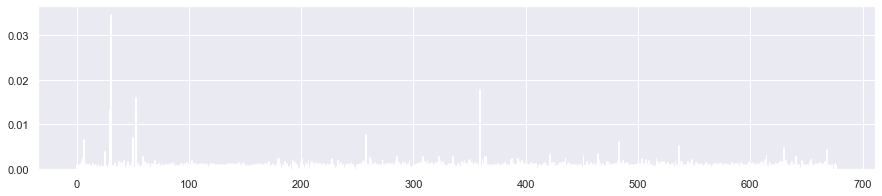

In [136]:
# Getting importance
importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance, color='red')
pyplot.show()
#plt.figure(figsize = (15,4))

In [9]:
# Plotting before and after tuning:
accu= [0.74, 0.79, 0.79]
F1 = [0.82, 0.87, 0.87]
precision = [0.87, 0.83, 0.83]
recall = [0.77, 0.92, 0.92]

lildf2=pd.DataFrame(list(zip(accu,F1,precision,recall)), columns=['Accuracy','F1','precision','recall'])
lildf2.index=['Baseline','Tuned Max_depth', 'Tuned Learning_rate']
lildf2

,Accuracy,F1,precision,recall
Baseline,0.74,0.82,0.87,0.77
Tuned Max_depth,0.79,0.87,0.83,0.92
Tuned Learning_rate,0.79,0.87,0.83,0.92


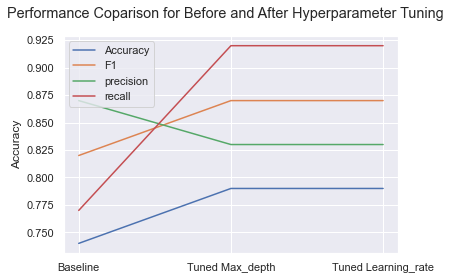

In [10]:
fig,ax = plt.subplots()
sns.lineplot(data=lildf2,x=lildf2.index,y='Accuracy');
sns.lineplot(data=lildf2,x=lildf2.index,y='F1');
sns.lineplot(data=lildf2,x=lildf2.index,y='precision');
sns.lineplot(data=lildf2,x=lildf2.index,y='recall');
plt.legend(labels=['Accuracy','F1','precision','recall'])
fig.suptitle('Performance Coparison for Before and After Hyperparameter Tuning');

# Challenges
The Springleaf project presented some challenges that had to be addressed in order to achieve the desired results. The following were the main challenges encountered:

* **Dealing with a large amount of data**: The dataset provided by Springleaf was quite extensive, consisting of numerous variables with unknown nature. This made it challenging to clean the data, select relevant features for the predictive model, understand the relationships between the variables and interpret feature importance.

* **High computing power requirement**: Given the size of the dataset and the complexity of the algorithms used, the computing power required was substantial. We used an I7 CPU with 32GB RAM for this project, but even then, it took hours to run some parts of the code.

Despite these challenges, we were able to successfully overcome them and achieve a high level of accuracy in our predictive model.

# Conclusion

In conclusion, we have successfully developed a machine learning model using XGBoost algorithm to predict which customers are likely to respond to a direct mail offer from Springleaf. 

We cleaned and preprocessed the data, created new variables, and tested various algorithms. Through rigorous testing, we found that XGBoost algorithm performed the best with our data, and after performing hyperparameter tuning using grid search, we were able to achieve a remarkable F1 score of 0.87. Our findings demonstrate that with proper feature selection and algorithm optimization, we can improve the efficiency and accuracy of Springleaf's direct mail marketing campaigns, and ultimately help connect customers in need with the loans and financial assistance they require.

However, there is still room for improvement. One potential next step could be to perform more extensive hyperparameter tuning to further optimize the XGBoost model. Another option could be to apply automated machine learning (AutoML) techniques to explore a wider range of machine learning models and identify any previously unexplored models that may perform well with the data.

Additionally, better feature engineering techniques could be explored to help better understand the anonymized features used in the dataset, which could lead to more informative and predictive features being created. Overall, there are several potential next steps that could be taken to further improve the accuracy of the predictive model and provide more insights for Springleaf's marketing strategy.